# Attention Demo: Image Captioning
This notebook can only be run once from the beginning to end. I will probably write another  notebook similar to this one, which can be run more freely.

## MS-COCO Dataset
`> 82,000` images, each of which has at least `5` different caption annotations.

**Caution.** Large download ahead: `> 13GB`

In [1]:
from pathlib import Path
import tensorflow as tf

In [2]:
annotation_folder = Path("annotations/")

In [3]:
annotation_folder.exists()

True

In [4]:
if not annotation_folder.exists():
    # This will download the zip file from the url to our local file ./captions.zip and
    # extract its content (to annotations/). At the end, `annotation_zip` will
    # contain the absolute path to ./captions.zip
    annotation_zip = tf.keras.utils.get_file(
        "captions.zip",
        cache_subdir=Path.cwd(),
        origin="http://images.cocodataset.org/annotations/annotations_trainval2014.zip",
        extract=True,
    )

In [5]:
!ls -lh

total 6.3M
drwxr-xr-x 2 phunc20 wheel 4.0K Jul  1 23:43 annotations
drwxr-xr-x 3 phunc20 wheel 4.0K Jul  6 23:38 corbeille
-rw-r--r-- 1 phunc20 wheel 1.4M Jul  6 23:36 image_captioning.ipynb
drwxr-xr-x 2 phunc20 wheel 5.0M Jul  6 23:38 train2014
-rw-r--r-- 1 phunc20 wheel 3.9K Jul  6 23:15 trash.py
-rw-r--r-- 1 phunc20 wheel  555 Jul  5 22:57 Untitled.ipynb


In [6]:
!ls annotations/

captions_train2014.json   instances_val2014.json
captions_val2014.json	  person_keypoints_train2014.json
instances_train2014.json  person_keypoints_val2014.json


In [7]:
![ -f captions.zip ] && unzip -l captions.zip

unzip:  cannot find or open captions.zip, captions.zip.zip or captions.zip.ZIP.


In [8]:
![ -f captions.zip ] && rm captions.zip

rm: cannot remove 'captions.zip': No such file or directory


In [9]:
annotation_file = annotation_folder / "captions_train2014.json"
annotation_file.exists()

True

In [ ]:
# Download image files: Similar to the above, we download and extract a zip file.
# This time the image files, whose download may take 3-4 hours (in VN).
image_folder = Path("train2014/")
if not image_folder.exists():
    image_zip = tf.keras.utils.get_file(
        "train2014.zip",
        cache_subdir=Path.cwd(),
        origin="http://images.cocodataset.org/zips/train2014.zip",
        extract=True,
    )
Path(image_zip).unlink()

In [11]:
image_folder.exists()

True

Let's peek into the annotation json file.

In [12]:
import json

In [13]:
with open(annotation_file, "r") as f:
    annotations = json.load(f)
annotations.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [14]:
annotations["images"]

[{'license': 5,
  'file_name': 'COCO_train2014_000000057870.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-14 16:28:13',
  'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
  'id': 57870},
 {'license': 5,
  'file_name': 'COCO_train2014_000000384029.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg',
  'height': 429,
  'width': 640,
  'date_captured': '2013-11-14 16:29:45',
  'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
  'id': 384029},
 {'license': 1,
  'file_name': 'COCO_train2014_000000222016.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000222016.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-14 16:37:59',
  'flickr_url': 'http://farm2.staticflickr.com/1431/1118526611_09172475e5_z.jpg',
  'id': 222016},
 {'license': 3

In [15]:
annotations["annotations"]

[{'image_id': 318556,
  'id': 48,
  'caption': 'A very clean and well decorated empty bathroom'},
 {'image_id': 116100,
  'id': 67,
  'caption': 'A panoramic view of a kitchen and all of its appliances.'},
 {'image_id': 318556,
  'id': 126,
  'caption': 'A blue and white bathroom with butterfly themed wall tiles.'},
 {'image_id': 116100,
  'id': 148,
  'caption': 'A panoramic photo of a kitchen and dining room'},
 {'image_id': 379340,
  'id': 173,
  'caption': 'A graffiti-ed stop sign across the street from a red car '},
 {'image_id': 379340,
  'id': 188,
  'caption': 'A vandalized stop sign and a red beetle on the road'},
 {'image_id': 318556,
  'id': 219,
  'caption': 'A bathroom with a border of butterflies and blue paint on the walls above it.'},
 {'image_id': 318556,
  'id': 255,
  'caption': 'An angled view of a beautifully decorated bathroom.'},
 {'image_id': 134754,
  'id': 272,
  'caption': 'The two people are walking down the beach.'},
 {'image_id': 538480,
  'id': 288,
  'ca

In [16]:
list(image_folder.iterdir())[:10]

[PosixPath('train2014/COCO_train2014_000000276386.jpg'),
 PosixPath('train2014/COCO_train2014_000000540843.jpg'),
 PosixPath('train2014/COCO_train2014_000000534094.jpg'),
 PosixPath('train2014/COCO_train2014_000000084815.jpg'),
 PosixPath('train2014/COCO_train2014_000000532941.jpg'),
 PosixPath('train2014/COCO_train2014_000000450832.jpg'),
 PosixPath('train2014/COCO_train2014_000000359996.jpg'),
 PosixPath('train2014/COCO_train2014_000000275612.jpg'),
 PosixPath('train2014/COCO_train2014_000000256184.jpg'),
 PosixPath('train2014/COCO_train2014_000000165436.jpg')]

Note that

- `annotations["images"]` contains the training images and each one of them is assigned with an id
- `annotations["annotations"]` contains the captions and the image id whose image the caption corresponds to
  - The number of annotations is roughly 5 times that of images

In [17]:
# (# training images), (# training annotations/captions), (# training and testing images)
len(annotations["images"]), len(annotations["annotations"]), len(list(image_folder.iterdir()))

(82783, 414113, 82783)

### The Magic of `collections.defaultdict(list)`

In [18]:
import collections

In [19]:
image_path_to_caption = collections.defaultdict(list)
image_path_to_caption

defaultdict(list, {})

In [20]:
for i, val in enumerate(annotations["annotations"]):
    caption = f"<start> {val['caption']} <end>"  # SOS and EOS tokens
    image_path = image_folder / f"COCO_train2014_{val['image_id']:012d}.jpg"
    if i < 5:
        print(f"image_path = {image_path}")
        print(f"caption = {caption}")
    image_path_to_caption[image_path].append(caption)

image_path = train2014/COCO_train2014_000000318556.jpg
caption = <start> A very clean and well decorated empty bathroom <end>
image_path = train2014/COCO_train2014_000000116100.jpg
caption = <start> A panoramic view of a kitchen and all of its appliances. <end>
image_path = train2014/COCO_train2014_000000318556.jpg
caption = <start> A blue and white bathroom with butterfly themed wall tiles. <end>
image_path = train2014/COCO_train2014_000000116100.jpg
caption = <start> A panoramic photo of a kitchen and dining room <end>
image_path = train2014/COCO_train2014_000000379340.jpg
caption = <start> A graffiti-ed stop sign across the street from a red car  <end>


**Rmk.** I am not sure if using `Path` objects as keys is a good idea.

In [21]:
image_path_to_caption['train2014/COCO_train2014_000000318556.jpg']

[]

Each image may have several valid captions. This is the magic of `collections.defaultdict(list)`.

In [22]:
image_path_to_caption[Path('train2014/COCO_train2014_000000318556.jpg')]

['<start> A very clean and well decorated empty bathroom <end>',
 '<start> A blue and white bathroom with butterfly themed wall tiles. <end>',
 '<start> A bathroom with a border of butterflies and blue paint on the walls above it. <end>',
 '<start> An angled view of a beautifully decorated bathroom. <end>',
 '<start> A clock that blends in with the wall hangs in a bathroom.  <end>']

In [23]:
import random

In [24]:
image_paths = list(image_path_to_caption.keys())
random.seed(42)
random.shuffle(image_paths)

n_train_instances = 6000
# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = image_paths[:n_train_instances]

In [25]:
train_captions = []
image_path_vector = []
# train_captions will be a list of strings
# image_path_vector will be a list of (repeated) Paths
# These two lists come in pa

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    image_path_vector.extend([image_path] * len(caption_list))

for i in range(20):
    print(f"image_path_vector[{i}] =\n{image_path_vector[i]}")

image_path_vector[0] =
train2014/COCO_train2014_000000448509.jpg
image_path_vector[1] =
train2014/COCO_train2014_000000448509.jpg
image_path_vector[2] =
train2014/COCO_train2014_000000448509.jpg
image_path_vector[3] =
train2014/COCO_train2014_000000448509.jpg
image_path_vector[4] =
train2014/COCO_train2014_000000448509.jpg
image_path_vector[5] =
train2014/COCO_train2014_000000357583.jpg
image_path_vector[6] =
train2014/COCO_train2014_000000357583.jpg
image_path_vector[7] =
train2014/COCO_train2014_000000357583.jpg
image_path_vector[8] =
train2014/COCO_train2014_000000357583.jpg
image_path_vector[9] =
train2014/COCO_train2014_000000357583.jpg
image_path_vector[10] =
train2014/COCO_train2014_000000414338.jpg
image_path_vector[11] =
train2014/COCO_train2014_000000414338.jpg
image_path_vector[12] =
train2014/COCO_train2014_000000414338.jpg
image_path_vector[13] =
train2014/COCO_train2014_000000414338.jpg
image_path_vector[14] =
train2014/COCO_train2014_000000414338.jpg
image_path_vector[15

In [59]:
# train_captions and image_path_vector come in pairs
len(train_captions), len(image_path_vector), len(train_image_paths)

(30018, 30018, 6000)

COCO_train2014_000000286764.jpg
<start> The large polar bear is swimming in the pool. <end>


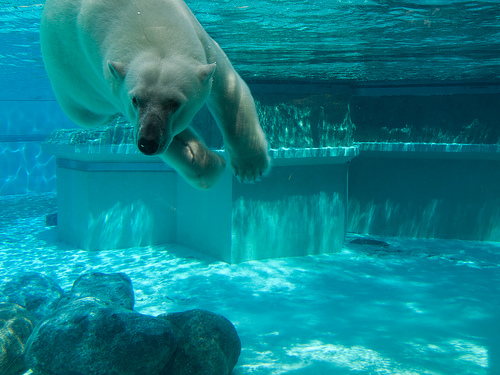

In [26]:
from PIL import Image
i = random.randint(0, len(train_captions)-1)
print(image_path_vector[i].name)
print(train_captions[i])
Image.open(image_path_vector[i])

## Feature Extraction Using InceptionV3
Let's sketch the steps that we will be going through:

- Resize the image to 299px by 299px
- Use the `tf.keras.applications.inception_v3.preprocess_input` method to normalize the image's pixel values to the range of $[-1,1]\,$ (InceptionV3's default input).
- Load the InceptionV3 model, decapitulate the head/output layer of the model
- Pass each image through the model to obtain the corresponding feature representation

#### N.B.
The authors of this notebook spoke of **bottleneck**. As I understand it, they discourage converting the images to feature representations during training. Instead, they recommend doing the feature extraction, saving them to disk and reusing them during the training.

One benefit or explanation I can think of for doing so is that we therefore **only have to convert the images to their representations once**. Had we opted the conversion during training, at the 2nd, 3rd, etc. epochs, we will have to compute feature representations again.


In [27]:
image_path_vector[0]

PosixPath('train2014/COCO_train2014_000000448509.jpg')

The author of the notebook chose to use `tf` functions to read the images. Some of them I am not quite familiar with. Let's see what each of them gives.

In [28]:
# tf.io.read_file does not accept Path object, that's why we put the str()
tf.io.read_file(str(image_path_vector[0]))

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x0

It seems that `tf.image` does not have a method like `cv2.imread`, so the standard way of reading images is like shown here:

01. `binary_tensor = tf.io.read_file(str_image_path)`
02. `uint8_tensor = tf.image.decode_jpeg(binary_tensor)` if the image is a JPEG image. There are similar methods to this: `decode_png`, `decode_bmp`, `decode_bmp`. The `decode_image` method might be able to automatically detect image format.

In [60]:
binary_tensor = tf.io.read_file(str(image_path_vector[0]))
tf.image.decode_jpeg(binary_tensor, channels=3)

<tf.Tensor: shape=(427, 640, 3), dtype=uint8, numpy=
array([[[182, 137,  80],
        [183, 139,  74],
        [184, 135,  69],
        ...,
        [ 93, 101,  86],
        [ 97,  95,  82],
        [ 92,  91,  73]],

       [[180, 138,  66],
        [182, 139,  70],
        [183, 134,  75],
        ...,
        [ 95, 108,  91],
        [ 98, 100,  87],
        [100,  99,  81]],

       [[182, 137,  69],
        [179, 136,  68],
        [185, 136,  78],
        ...,
        [ 96, 113,  97],
        [ 98, 101,  90],
        [106, 107,  93]],

       ...,

       [[109, 129, 138],
        [ 98, 118, 125],
        [ 98, 118, 125],
        ...,
        [170, 163, 153],
        [172, 166, 154],
        [168, 162, 146]],

       [[104, 122, 132],
        [ 95, 114, 121],
        [ 97, 116, 123],
        ...,
        [164, 157, 147],
        [166, 160, 148],
        [161, 155, 139]],

       [[103, 120, 130],
        [ 97, 114, 122],
        [ 98, 117, 124],
        ...,
        [161, 154, 14

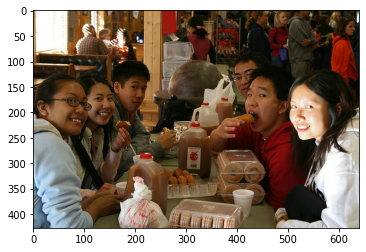

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(_.numpy());

In [30]:
import tensorflow.keras as keras

def load_image(str_image_path):
    binary_tensor = tf.io.read_file(str_image_path)
    uint8_tensor = tf.image.decode_jpeg(binary_tensor, channels=3)
    resized_tensor = tf.image.resize(uint8_tensor, (299, 299))
    normalized_tensor = keras.applications.inception_v3.preprocess_input(resized_tensor)
    # preprocess_input() normalizes the pixel values to [-1, 1]
    return normalized_tensor, str_image_path

In [31]:
headless_inception_model = keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
)
feature_extraction_model = keras.Model(
    headless_inception_model.input,
    headless_inception_model.layers[-1].output,
)

### Caching the features extracted from InceptionV3
> You will pre-process each image with InceptionV3 and cache the output to disk. Caching the output in RAM would be faster but also memory intensive, requiring `8 * 8 * 2048` floats per image. At the time of writing, this exceeds the memory limitations of Colab (currently 12GB of memory).
>
> Performance could be improved with a more sophisticated caching strategy (for example, by sharding the images to reduce random access disk I/O), but that would require more code.
>
> The caching will take about 10 minutes to run in Colab with a GPU. 

In [32]:
feature_extraction_model.output

<tf.Tensor 'mixed10/Identity:0' shape=(None, None, None, 2048) dtype=float32>

In [33]:
n_bytes_per_image_feature = 8*8*2048*4
n_bytes_per_image_feature

524288

In [34]:
# RAM usage if caching the entire training set to RAM
(n_train_instances * n_bytes_per_image_feature) / 1e9  # in GB

3.145728

**(?)** We calculated and obtained the RAM usage of only `3.14GB`. Why in the original article it said that the RAM usage will exceed the limit of `12GB` of Colab notebooks?

In [35]:
# Recall that the paths in the list image_path_vector are repetitive.
len(image_path_vector), len(set(image_path_vector))

(30018, 6000)

In [36]:
tf.__version__

'2.2.0'

In [38]:
# Using set() to make the image paths unique, because they are repetitive in image_path_vector
#unique_image_paths = set(image_path_vector)
unique_image_paths = [str(path) for path in train_image_paths]

#image_dataset = tf.data.Dataset.from_tensor_slices(unique_image_paths)
## TypeError: Could not build a TypeSpec for unique_image_paths with an unsupported type (<class 'set'>) to a Tensor.

#image_dataset = tf.data.Dataset.from_tensor_slices(list(unique_image_paths))
## Still error. pathlib.PosixPath cannot be the value of a tensor.

# image_dataset = tf.data.Dataset.from_tensor_slices(
#     [str(path) for path in unique_image_paths])

image_dataset = tf.data.Dataset.from_tensor_slices(unique_image_paths)

n_batched_images = 16

# Feel free to change the batch_size in batch() according to your system configuration
image_dataset = image_dataset.map(
    load_image,
    #num_parallel_calls=tf.data.AUTOTUNE,
    ## AttributeError: module 'tensorflow._api.v2.data' has no attribute 'AUTOTUNE'
    ## tf.__version__ equals '2.2.0'
).batch(n_batched_images)

Note that since `tf` does not support data type as `pathlib.PosixPath`, we have to convert them into strings (`tf` does support data type as string).

**(?)** `image_dataset.shard`?

`tf.data.Dataset`s are not generators (so no `next()` method).

**(?)** What mechanism does `tf` use to loop thru a `tf.data.Dataset` then?

Let's print the first item/batch in `image_dataset`:

In [40]:
for item in image_dataset:
    print(item)
    break

(<tf.Tensor: shape=(16, 299, 299, 3), dtype=float32, numpy=
array([[[[-1.26041055e-01,  6.02006912e-02,  3.43550324e-01],
         [-1.41933560e-01,  8.07707310e-02,  3.49019647e-01],
         [-1.40796065e-01,  8.90287161e-02,  3.55695367e-01],
         ...,
         [-1.28558159e-01,  4.51579094e-02,  3.66726518e-01],
         [-1.78702414e-01,  5.33542633e-02,  3.55280876e-01],
         [-1.77549064e-01,  5.10039330e-02,  3.52413774e-01]],

        [[-1.37223899e-01,  7.82607794e-02,  3.49019647e-01],
         [-1.52219832e-01,  8.23529959e-02,  3.49019647e-01],
         [-1.47325277e-01,  9.11487341e-02,  3.56755376e-01],
         ...,
         [-1.23902798e-01,  4.98132706e-02,  3.71381879e-01],
         [-1.81007802e-01,  5.88235855e-02,  3.56862783e-01],
         [-1.56486452e-01,  6.28848076e-02,  3.67354989e-01]],

        [[-1.51866496e-01,  8.86754990e-02,  3.61099005e-01],
         [-1.63645983e-01,  9.80392694e-02,  3.64915848e-01],
         [-1.60784304e-01,  9.80392694e-

In [41]:
type(item)

tuple

In [42]:
len(item)

2

In [43]:
item[-1]

<tf.Tensor: shape=(16,), dtype=string, numpy=
array([b'train2014/COCO_train2014_000000287378.jpg',
       b'train2014/COCO_train2014_000000426994.jpg',
       b'train2014/COCO_train2014_000000550392.jpg',
       b'train2014/COCO_train2014_000000158322.jpg',
       b'train2014/COCO_train2014_000000004891.jpg',
       b'train2014/COCO_train2014_000000040398.jpg',
       b'train2014/COCO_train2014_000000097255.jpg',
       b'train2014/COCO_train2014_000000059979.jpg',
       b'train2014/COCO_train2014_000000296093.jpg',
       b'train2014/COCO_train2014_000000128665.jpg',
       b'train2014/COCO_train2014_000000083148.jpg',
       b'train2014/COCO_train2014_000000177618.jpg',
       b'train2014/COCO_train2014_000000449841.jpg',
       b'train2014/COCO_train2014_000000370682.jpg',
       b'train2014/COCO_train2014_000000067118.jpg',
       b'train2014/COCO_train2014_000000491642.jpg'], dtype=object)>

In [44]:
item[0].shape

TensorShape([16, 299, 299, 3])

In [45]:
item[-1][0]

<tf.Tensor: shape=(), dtype=string, numpy=b'train2014/COCO_train2014_000000287378.jpg'>

In [46]:
item[-1][0].numpy()

b'train2014/COCO_train2014_000000287378.jpg'

In [47]:
item[-1][0].numpy().decode("utf-8")

'train2014/COCO_train2014_000000287378.jpg'

In [48]:
import numpy as np

In [49]:
np.save("abcdefg.jpg", np.zeros((1,)))

In [50]:
!ls abcd*

abcdefg.jpg.npy


In [51]:
![ -f abcd* ] && rm abcd*

In [52]:
from tqdm import tqdm

In [53]:
import time
for i in tqdm(range(10)):
    time.sleep(0.5)

100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


**Rmk.**<br>
Note that since `image_dataset` is a generator-like object, simply putting it in `tqdm()` will not show a progress bar. A trick that I found on the Internet is to manually put the `(# of elements in the generator-like object)`. Let's try it. (Oh, btw, in a Jupyter notebook, it is better to use `from tqdm.notebook import tqdm`)

In [54]:
del tqdm
try:
    tqdm
    print("can use tqdm")
except:
    print("del tqdm (already)")

del tqdm (already)


In [55]:
from tqdm.notebook import tqdm

In [56]:
n_batches = len(unique_image_paths) // n_batched_images + \
            (len(unique_image_paths) % n_batched_images > 0)
n_batches

375

In [57]:
for batch_images, batch_paths in tqdm(image_dataset, total=n_batches):
    batch_features = feature_extraction_model(batch_images)
    # e.g. if batch_features has shape (16, 299, 299, 3) then the next line reshape it to (16, 299**2, 3)
    batch_features = tf.reshape(
        batch_features,
        (batch_features.shape[0], -1, batch_features.shape[-1]),
    )
    # for each image in a batch, say named abc.jpg, we save its feature to abc.jpg.npy
    for features, tensor_path in zip(batch_features, batch_paths):
        # strings in a tf tensor are stored as binary strings, so we decode("utf-8")
        str_path = tensor_path.numpy().decode("utf-8")
        # The next np.save() will not overwrite str_path, but will write to f"{str_path}.npy"
        np.save(str_path, features.numpy())

  0%|          | 0/375 [00:00<?, ?it/s]

### Preprocess and tokenize the captions
- First, you'll tokenize the captions (for example, by splitting on spaces). This gives us a vocabulary of all of the unique words in the data (for example, "surfing", "football", and so on).
- Next, you'll limit the vocabulary size to the top 5,000 words (to save memory). You'll replace all other words with the token "UNK" (unknown).
- You then create word-to-index and index-to-word mappings.
- Finally, you pad all sequences to be the same length as the longest one.

In [68]:
# Limit to the tope 5_000 words from the vocabulary
top_k = 5_000
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=top_k,
    oov_token="<unk>",
    filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~',
)
tokenizer.fit_on_texts(train_captions)
tokenizer

In [70]:
[s for s in dir(tokenizer) if not s.startswith("_")]

['char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

In [71]:
tokenizer.num_words

5000

In [72]:
tokenizer.oov_token

'<unk>'

In [73]:
tokenizer.word_counts

OrderedDict([('<start>', 30018),
             ('a', 49937),
             ('group', 1103),
             ('of', 10128),
             ('young', 855),
             ('people', 2090),
             ('sitting', 2736),
             ('at', 2222),
             ('table', 1580),
             ('<end>', 30018),
             ('bunch', 282),
             ('are', 2089),
             ('eating', 453),
             ('donuts', 106),
             ('and', 7152),
             ('drinking', 75),
             ('cider', 5),
             ('children', 160),
             ('with', 7758),
             ('doughnuts', 63),
             ('the', 10100),
             ('smiling', 158),
             ('is', 5000),
             ('enjoying', 55),
             ('their', 455),
             ('meal', 92),
             ('together', 319),
             ('woman', 1793),
             ('practices', 2),
             ('her', 549),
             ('tennis', 952),
             ('stance', 9),
             ('inside', 293),
             ('hotel', 6

In [74]:
tokenizer.index_word

{1: '<unk>',
 2: 'a',
 3: '<start>',
 4: '<end>',
 5: 'on',
 6: 'of',
 7: 'the',
 8: 'in',
 9: 'with',
 10: 'and',
 11: 'is',
 12: 'man',
 13: 'to',
 14: 'sitting',
 15: 'an',
 16: 'two',
 17: 'standing',
 18: 'at',
 19: 'people',
 20: 'are',
 21: 'next',
 22: 'white',
 23: 'woman',
 24: 'table',
 25: 'street',
 26: 'holding',
 27: 'that',
 28: 'some',
 29: 'person',
 30: 'down',
 31: 'it',
 32: 'large',
 33: 'field',
 34: 'top',
 35: 'group',
 36: 'up',
 37: 'small',
 38: 'dog',
 39: 'his',
 40: 'near',
 41: 'black',
 42: 'red',
 43: 'tennis',
 44: 'riding',
 45: 'front',
 46: 'plate',
 47: 'train',
 48: 'baseball',
 49: 'room',
 50: 'by',
 51: 'young',
 52: 'water',
 53: 'while',
 54: 'cat',
 55: 'bathroom',
 56: 'has',
 57: 'blue',
 58: 'walking',
 59: 'kitchen',
 60: 'sign',
 61: 'food',
 62: 'grass',
 63: 'green',
 64: 'building',
 65: 'playing',
 66: 'looking',
 67: 'bus',
 68: 'side',
 69: 'there',
 70: 'pizza',
 71: 'three',
 72: 'snow',
 73: 'boy',
 74: 'other',
 75: 'bed',
 7

**(?)** `filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~'`? Review on `Tokenizer` please.

In [76]:
# index zero in the dictionary tokenizer.index_word is still vacant.
# Use it to store "<pad>" token.
tokenizer.word_index["<pad>"] = 0
tokenizer.index_word[0] = "<pad>"

In [77]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)
train_seqs

[[3, 2, 35, 6, 51, 19, 14, 18, 2, 24, 4],
 [3, 2, 35, 6, 19, 14, 18, 2, 24, 4],
 [3, 2, 163, 6, 19, 20, 104, 375, 10, 461, 2339, 4],
 [3, 2, 35, 6, 51, 269, 18, 2, 24, 9, 519, 4],
 [3, 7, 274, 35, 11, 571, 103, 407, 147, 4],
 [3, 2, 23, 3606, 81, 43, 1666, 155, 2, 540, 49, 4],
 [3, 2, 23, 3607, 2, 774, 8, 2, 540, 49, 9, 2, 43, 198, 4],
 [3, 2, 87, 382, 8, 43, 695, 11, 17, 155, 305, 9, 2, 43, 198, 4],
 [3, 2, 23, 730, 9, 2, 43, 198, 53, 78, 597, 4],
 [3, 2, 183, 382, 36, 13, 432, 43, 8, 15, 1233, 4],
 [3, 2, 29, 17, 5, 2, 83, 26, 2, 300, 113, 4],
 [3, 87, 26, 2, 149, 17, 18, 7, 551, 6, 7, 441, 4],
 [3, 2, 29, 11, 17, 9, 103, 149, 8, 194, 4],
 [3, 775, 345, 26, 113, 17, 18, 1151, 446, 5, 83, 4],
 [3, 2, 29, 26, 2, 149, 156, 5, 7, 83, 4],
 [3, 138, 744, 17, 40, 15, 137, 128, 5, 2, 3608, 26, 2, 236, 520, 4],
 [3, 2, 2088, 4701, 2, 387, 107, 2, 4702, 49, 4],
 [3, 2, 2614, 5, 2, 1027, 18, 7, 128, 6, 2, 314, 64, 4],
 [3, 2, 2088, 4703, 2, 387, 107, 2, 2089, 64, 4],
 [3, 2, 2614, 17, 5, 2, 102

In [79]:
import tensorflow.keras as keras

In [80]:
# Pad each vecgtor to the max length of the captions.
# If max length not provided, tf will deduce it from the input.
caption_vector = keras.preprocessing.sequence.pad_sequences(train_seqs, padding="post")
caption_vector

array([[  3,   2,  35, ...,   0,   0,   0],
       [  3,   2,  35, ...,   0,   0,   0],
       [  3,   2, 163, ...,   0,   0,   0],
       ...,
       [  3,   2,  12, ...,   0,   0,   0],
       [  3,   7,  59, ...,   0,   0,   0],
       [  3,   2,  12, ...,   0,   0,   0]], dtype=int32)

**Rmk.** It seems that padding using `pad_sequences()` will by default fill the vacancies with `0`'s and that's why `Tokenizer` purposedly leave `0` out of its dictionary keys -- It is free and up to us to name the value corresponding to the key `0`, here we named it `"<pad>"`.

In [81]:
# Find the max length of the captions in the dataset
def calc_max_length(seqs):
    return max(len(seq) for seq in seqs)

In [83]:
max_length = calc_max_length(caption_vector)
max_length

48

### Training and Validation Sets

In [85]:
path_to_cap_vector = collections.defaultdict(list)
for path, cap in zip(image_path_vector, caption_vector):
    path_to_cap_vector[path].append(cap)

path_to_cap_vector

defaultdict(list,
            {PosixPath('train2014/COCO_train2014_000000448509.jpg'): [array([ 3,  2, 35,  6, 51, 19, 14, 18,  2, 24,  4,  0,  0,  0,  0,  0,  0,
                      0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
                      0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                    dtype=int32),
              array([ 3,  2, 35,  6, 19, 14, 18,  2, 24,  4,  0,  0,  0,  0,  0,  0,  0,
                      0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
                      0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
                    dtype=int32),
              array([   3,    2,  163,    6,   19,   20,  104,  375,   10,  461, 2339,
                        4,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                        0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                        0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0

In [86]:
keys = list(path_to_cap_vector.keys())
random.shuffle(keys)

# 80%-20% split
index = int(len(keys) * 0.8)
train_keys, val_keys = keys[:index], keys[index:]

path_train = []
cap_train = []
for k in train_keys:
    n_captions = len(path_to_cap_vector[k])
    path_train.extend([k]*n_captions)
    cap_train.extend(path_to_cap_vector[k])

path_val = []
cap_val = []
for k in val_keys:
    n_captions = len(path_to_cap_vector[k])
    path_val.extend([k]*n_captions)
    cap_val.extend(path_to_cap_vector[k])

In [87]:
cap_val

[array([  3, 585,  19,  17, 109,   2,  24,   9, 955,   6, 303,   4,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 array([  3,   2,  35,   6,  19,  17, 109,   2,  24, 888,   9,  61,   4,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 array([  3,   2,  35,   6,  19,  17, 109,   2,  24,   4,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 array([  3, 750,   8, 104, 111,   9,  61, 327, 490,   5,  24,   4,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [88]:
path_val

[PosixPath('train2014/COCO_train2014_000000027742.jpg'),
 PosixPath('train2014/COCO_train2014_000000027742.jpg'),
 PosixPath('train2014/COCO_train2014_000000027742.jpg'),
 PosixPath('train2014/COCO_train2014_000000027742.jpg'),
 PosixPath('train2014/COCO_train2014_000000027742.jpg'),
 PosixPath('train2014/COCO_train2014_000000191230.jpg'),
 PosixPath('train2014/COCO_train2014_000000191230.jpg'),
 PosixPath('train2014/COCO_train2014_000000191230.jpg'),
 PosixPath('train2014/COCO_train2014_000000191230.jpg'),
 PosixPath('train2014/COCO_train2014_000000191230.jpg'),
 PosixPath('train2014/COCO_train2014_000000141414.jpg'),
 PosixPath('train2014/COCO_train2014_000000141414.jpg'),
 PosixPath('train2014/COCO_train2014_000000141414.jpg'),
 PosixPath('train2014/COCO_train2014_000000141414.jpg'),
 PosixPath('train2014/COCO_train2014_000000141414.jpg'),
 PosixPath('train2014/COCO_train2014_000000039664.jpg'),
 PosixPath('train2014/COCO_train2014_000000039664.jpg'),
 PosixPath('train2014/COCO_trai

In [89]:
len(path_train), len(cap_train), len(path_val), len(cap_val)

(24015, 24015, 6003, 6003)